In [1]:
# Importe
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Problemdefinition
m = 1000000

# Parameter
a = [3,4,5,6e10]
b = 4

# Erzeuge verrauschte (X,y)-Paare
X = 2 * np.random.rand(m, len(a))
y = b + np.matmul(X,a).reshape((m,1)) + np.random.randn(m, 1)

# Erweiterung der Matrix b um den y-Achsenabschnitt
X_b = np.c_[np.ones((m, 1)), X] # x0 = 1 zu jedem Datenpunkt hinzu 
n = X_b.shape[1]

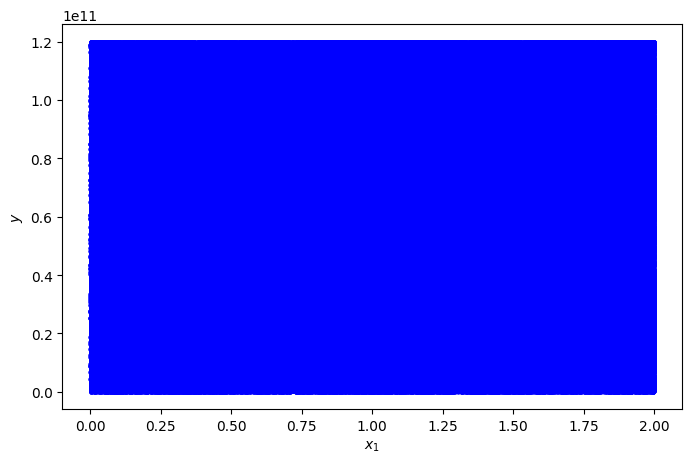

In [3]:
# Plot der Projektion auf die Ebene (y,x_1)
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],y,c="b",s=5) 
if len(a)==1: plt.plot([0,2],[b,b+2*a[0]],"r")
plt.xlabel("$x_1$");plt.ylabel("$y$") 
plt.show()

In [4]:
# Gradientenverfahren

# Startpunkt und Lernrate
x_0 = 10*np.ones((n,1))
alpha_k = 0.05

# Zeit starten und los...
t = time.time()
eps = 1; k = 0; x_k = x_0
while(eps>1e-4):

    # Gradient der Zielfunktion
    g = 2/m * X_b.T.dot(X_b.dot(x_k) - y) 

    # Suchrichtung und Abbruchbedingung festlegen
    p_k = -g
    eps = np.linalg.norm(g) 

    # Nächster Schritt
    x_k = x_k + alpha_k * p_k; k += 1
    if k%100==0: print(".",end="") # Fortschrittsanzeige

    #print(p_k)

# Zeit stoppen...
t = time.time() - t

# ... und Ergebnis ausgeben
print("\nresult:\n",x_k)
print(f"\ntime elapsed: {t:.2f}s")
print("iterations:  ", k)


................................................
result:
 [[4.00226750e+00]
 [2.99842842e+00]
 [3.99779122e+00]
 [5.00053871e+00]
 [6.00000000e+10]]

time elapsed: 42.25s
iterations:   4839


In [5]:
# Newton-Verfahren

# Startpunkt und Lernrate
x_0 = 10*np.ones((n,1))
alpha_k = 1

# Zeit starten und los...
t = time.time()
eps = 1; k = 0; x_k = x_0
while(eps>1e-4):

    # Gradient der Zielfunktion
    g = 2/m * X_b.T.dot(X_b.dot(x_k) - y) 

    # Numerische Berechnung der Hesse-Matrix
    delta = .01
    H = np.zeros((n,n))
    for j in range(len(x_k)):
        dx = np.zeros_like(x_k,np.float64)
        dx[j] = delta
        g_dx = 2/m * X_b.T.dot(X_b.dot(x_k+dx) - y) 
        H[j] = ((g_dx - g) / delta).reshape((n))

    H = .5*(H+H.T) # Symmetrisierung wg. numerischer Stabilität

    
    # Suchrichtung und Abbruchbedingung festlegen
    p_k = -np.linalg.solve(H,g)
    eps = np.linalg.norm(g) # Abbruchbedingung

    # Nächster Schritt
    x_k = x_k + alpha_k * p_k; k += 1
    if k%100==0: print(".",end="") # Fortschrittsanzeige

    #print(p_k)

# Zeit stoppen...
t = time.time() - t

# ... und Ergebnis ausgeben
print("\nresult:\n",x_k)
print(f"\ntime elapsed: {t:.2f}s")
print("iterations:  ", k)


result:
 [[4.00164604e+00]
 [2.99855505e+00]
 [3.99791744e+00]
 [5.00066513e+00]
 [6.00000000e+10]]

time elapsed: 0.37s
iterations:   7
